In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
dataset_path = 'data/processed/preprocessed_dataset.csv'
df = pd.read_csv(dataset_path)

# Display the first 5 rows of the dataset to get a feel for the data.
df.head()

,run,Time_ms,Pc_bar,Tc_K,Pinj_bar,rho_kgm3,mu_Pas,angle_shadow_deg,len_shadow_L_D,angle_mie_deg,len_mie_L_D
0,ETH-01,0.000,55.03180,192.029519,98.864550,810.720228,0.001879,16.694545,13.126559,12.937325,17.571262
1,ETH-01,0.025,55.00570,192.015831,98.874062,810.718262,0.001879,16.694545,13.126559,12.937325,17.571262
2,ETH-01,0.050,55.00810,191.988228,98.907356,810.718443,0.001879,16.694545,13.126559,12.937325,17.571262
3,ETH-01,0.075,55.01635,192.081988,98.855037,810.719065,0.001879,16.694545,13.126559,12.937325,17.571262
4,ETH-01,0.100,55.01250,191.988000,98.878819,810.718775,0.001879,16.694545,20.204667,12.937325,24.506565


In [17]:
# --- Initial Data Exploration ---
# Get a first impression of the dataset by examining its structure, statistics, and first few rows.

# Display a concise summary of the DataFrame, including data types and non-null values.
print("### Dataframe Info ###")
df.info()
print("\n" + "="*80 + "\n")

# Generate descriptive statistics for numerical columns.
print("### Statistical Summary ###")
print(df.describe())
print("\n" + "="*80 + "\n")

# Display additional information about the DataFrame.
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

### Dataframe Info ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   run               726 non-null    object 
 1   Time_ms           726 non-null    float64
 2   Pc_bar            726 non-null    float64
 3   Tc_K              726 non-null    float64
 4   Pinj_bar          726 non-null    float64
 5   rho_kgm3          726 non-null    float64
 6   mu_Pas            726 non-null    float64
 7   angle_shadow_deg  726 non-null    float64
 8   len_shadow_L_D    726 non-null    float64
 9   angle_mie_deg     726 non-null    float64
 10  len_mie_L_D       726 non-null    float64
dtypes: float64(10), object(1)
memory usage: 62.5+ KB


### Statistical Summary ###
          Time_ms      Pc_bar        Tc_K    Pinj_bar    rho_kgm3      mu_Pas  \
count  726.000000  726.000000  726.000000  726.000000  726.000000  726.000000   
mean     1.5000

In [18]:
# Shows essential summary stats—mean, std, min, max, missing—for each variable.

desc = df.describe(include="all").T
desc["missing"] = df.isnull().sum()
desc = desc[["count","missing","mean","std","min","25%","50%","75%","max"]]
display(desc)

,count,missing,mean,std,min,25%,50%,75%,max
run,726,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time_ms,726.0,0,1.5,0.873814,0.0,0.75,1.5,2.25,3.0
Pc_bar,726.0,0,65.019419,9.998905,54.99565,55.025825,65.02315,75.009837,75.04805
Tc_K,726.0,0,258.137283,46.841526,191.733413,192.050107,290.880986,291.547624,291.729725
Pinj_bar,726.0,0,108.429146,9.988893,94.246025,98.764663,108.509466,118.207922,122.404313
rho_kgm3,726.0,0,782.042263,41.651589,721.84333,724.543792,810.72016,812.210693,812.213757
mu_Pas,726.0,0,0.001374,0.000728,0.000342,0.000349,0.001879,0.001898,0.001898
angle_shadow_deg,726.0,0,18.909342,1.218069,16.403973,17.817381,18.876824,20.217116,21.180159
len_shadow_L_D,726.0,0,130.907093,50.784344,13.126559,94.649799,139.405075,172.908062,213.870494
angle_mie_deg,726.0,0,13.25509,1.298475,11.751586,12.080411,12.937325,14.244814,16.236476


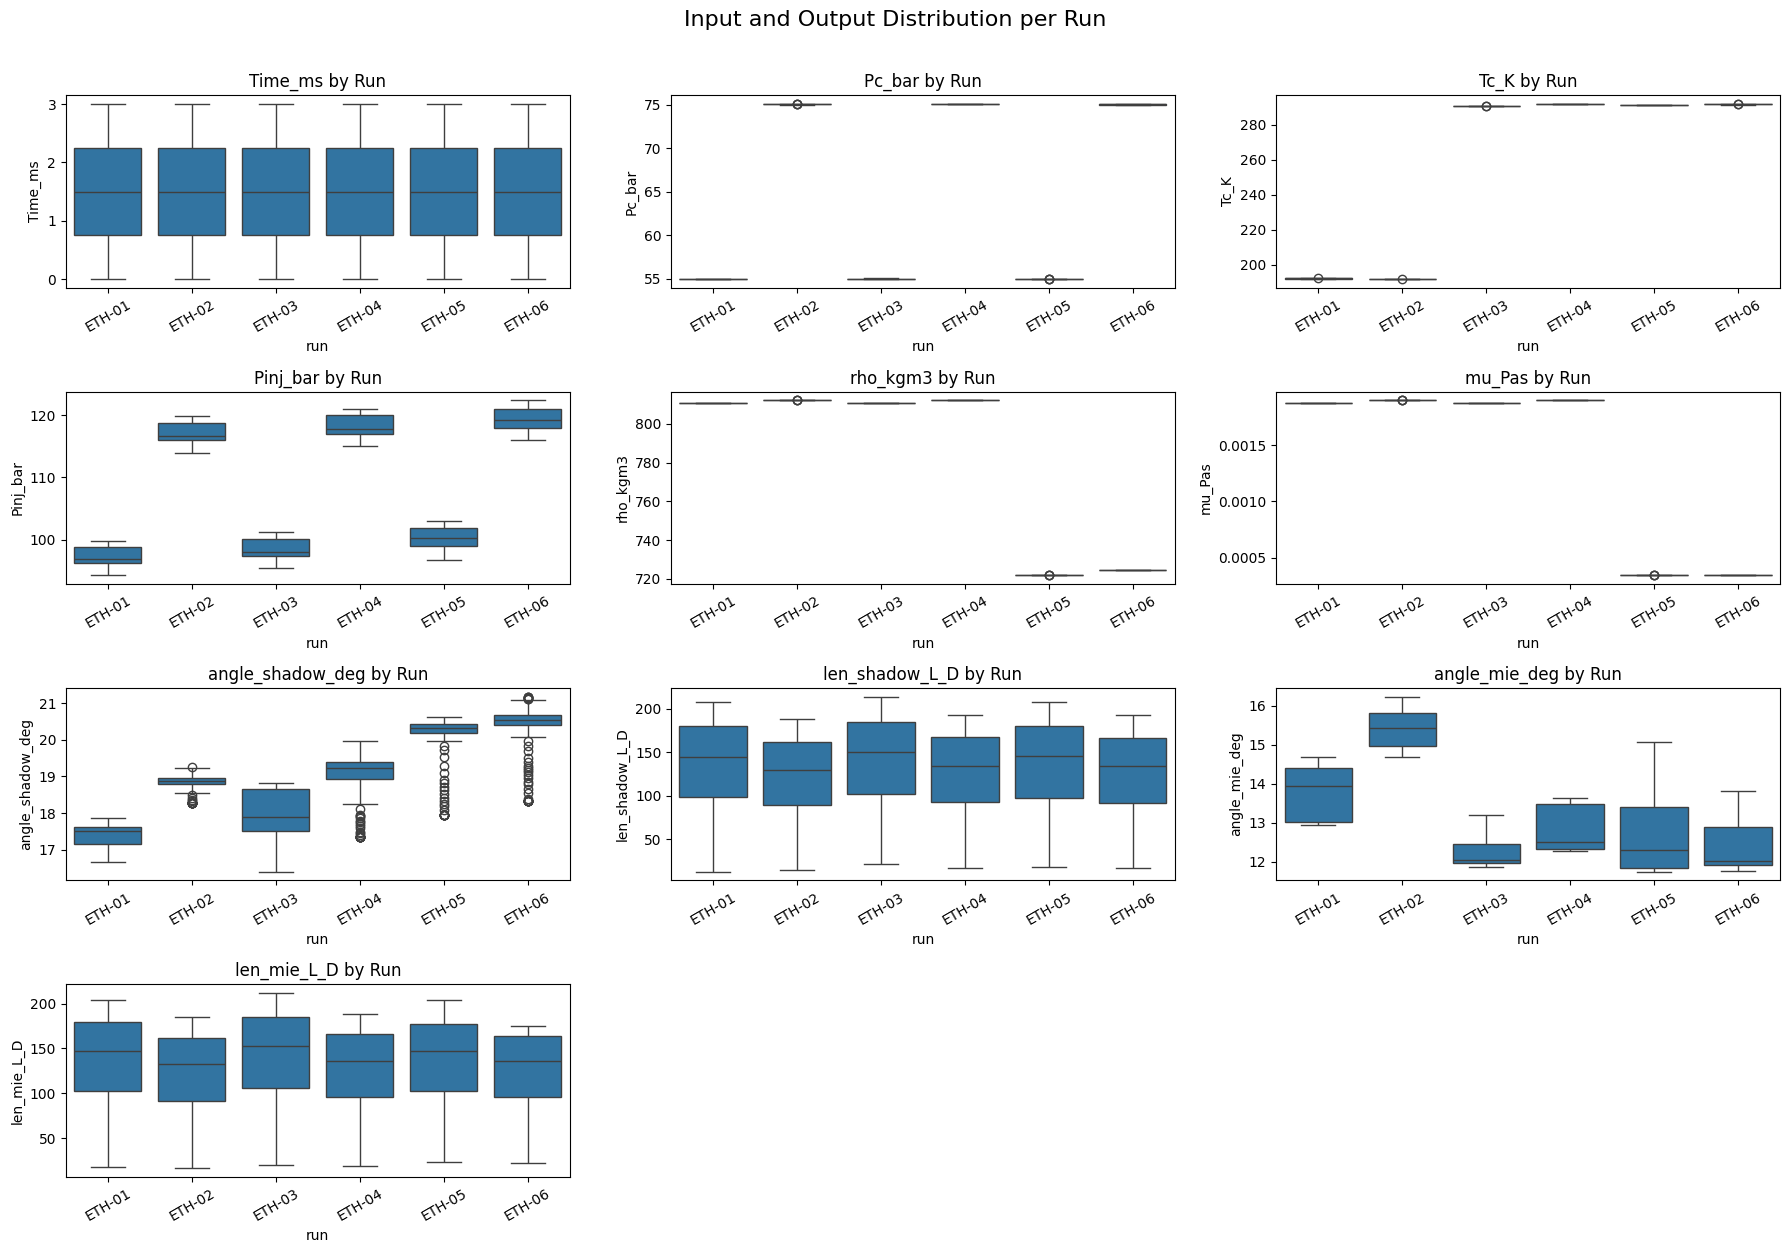

In [20]:
# Boxplots of inputs and outputs (distribution per run)
# Shows variable range, spread, and outliers for each ETH run—useful for experimental coverage.

input_features  = ["Time_ms","Pc_bar","Tc_K","Pinj_bar","rho_kgm3","mu_Pas"]
output_targets  = ["angle_shadow_deg","len_shadow_L_D","angle_mie_deg","len_mie_L_D"]

plt.figure(figsize=(18,12))
for idx, col in enumerate(input_features + output_targets):
    plt.subplot(4,3,idx+1)
    sns.boxplot(x="run", y=col, data=df)
    plt.title(f"{col} by Run")
    plt.xticks(rotation=30)
plt.tight_layout()
plt.suptitle("Input and Output Distribution per Run", y=1.04, fontsize=16)
plt.show()


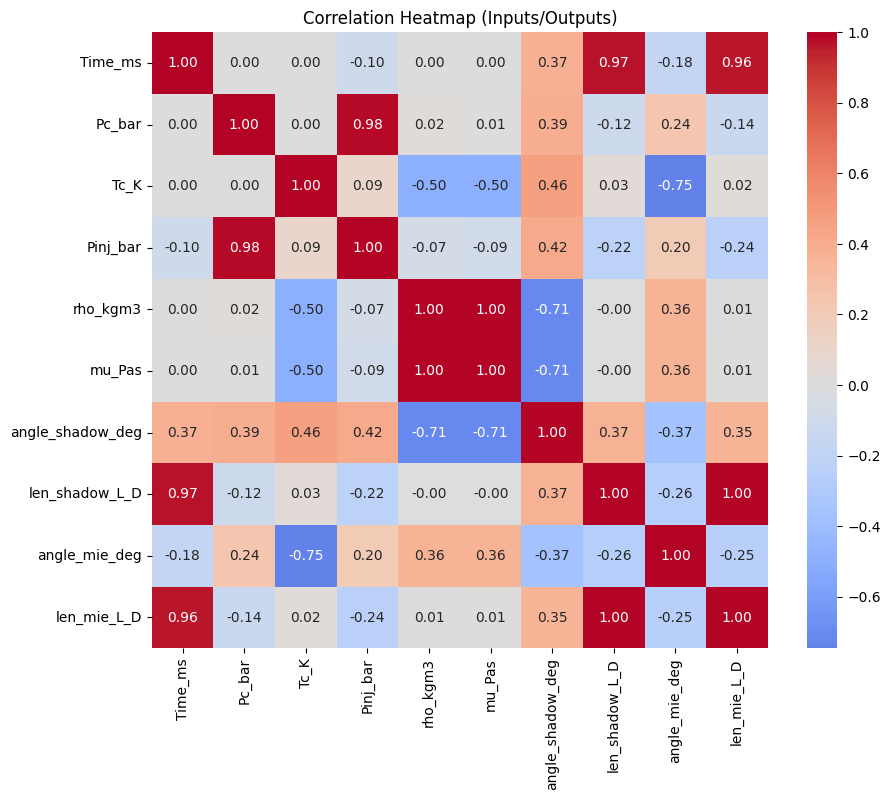

In [21]:
# Correlation heatmap (Pearson)
# Displays how strongly each input relates to each output and to other inputs—supports feature selection and interprets relationships.

plt.figure(figsize=(10,8))
corr = df[input_features + output_targets].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, center=0)
plt.title("Correlation Heatmap (Inputs/Outputs)")
plt.show()


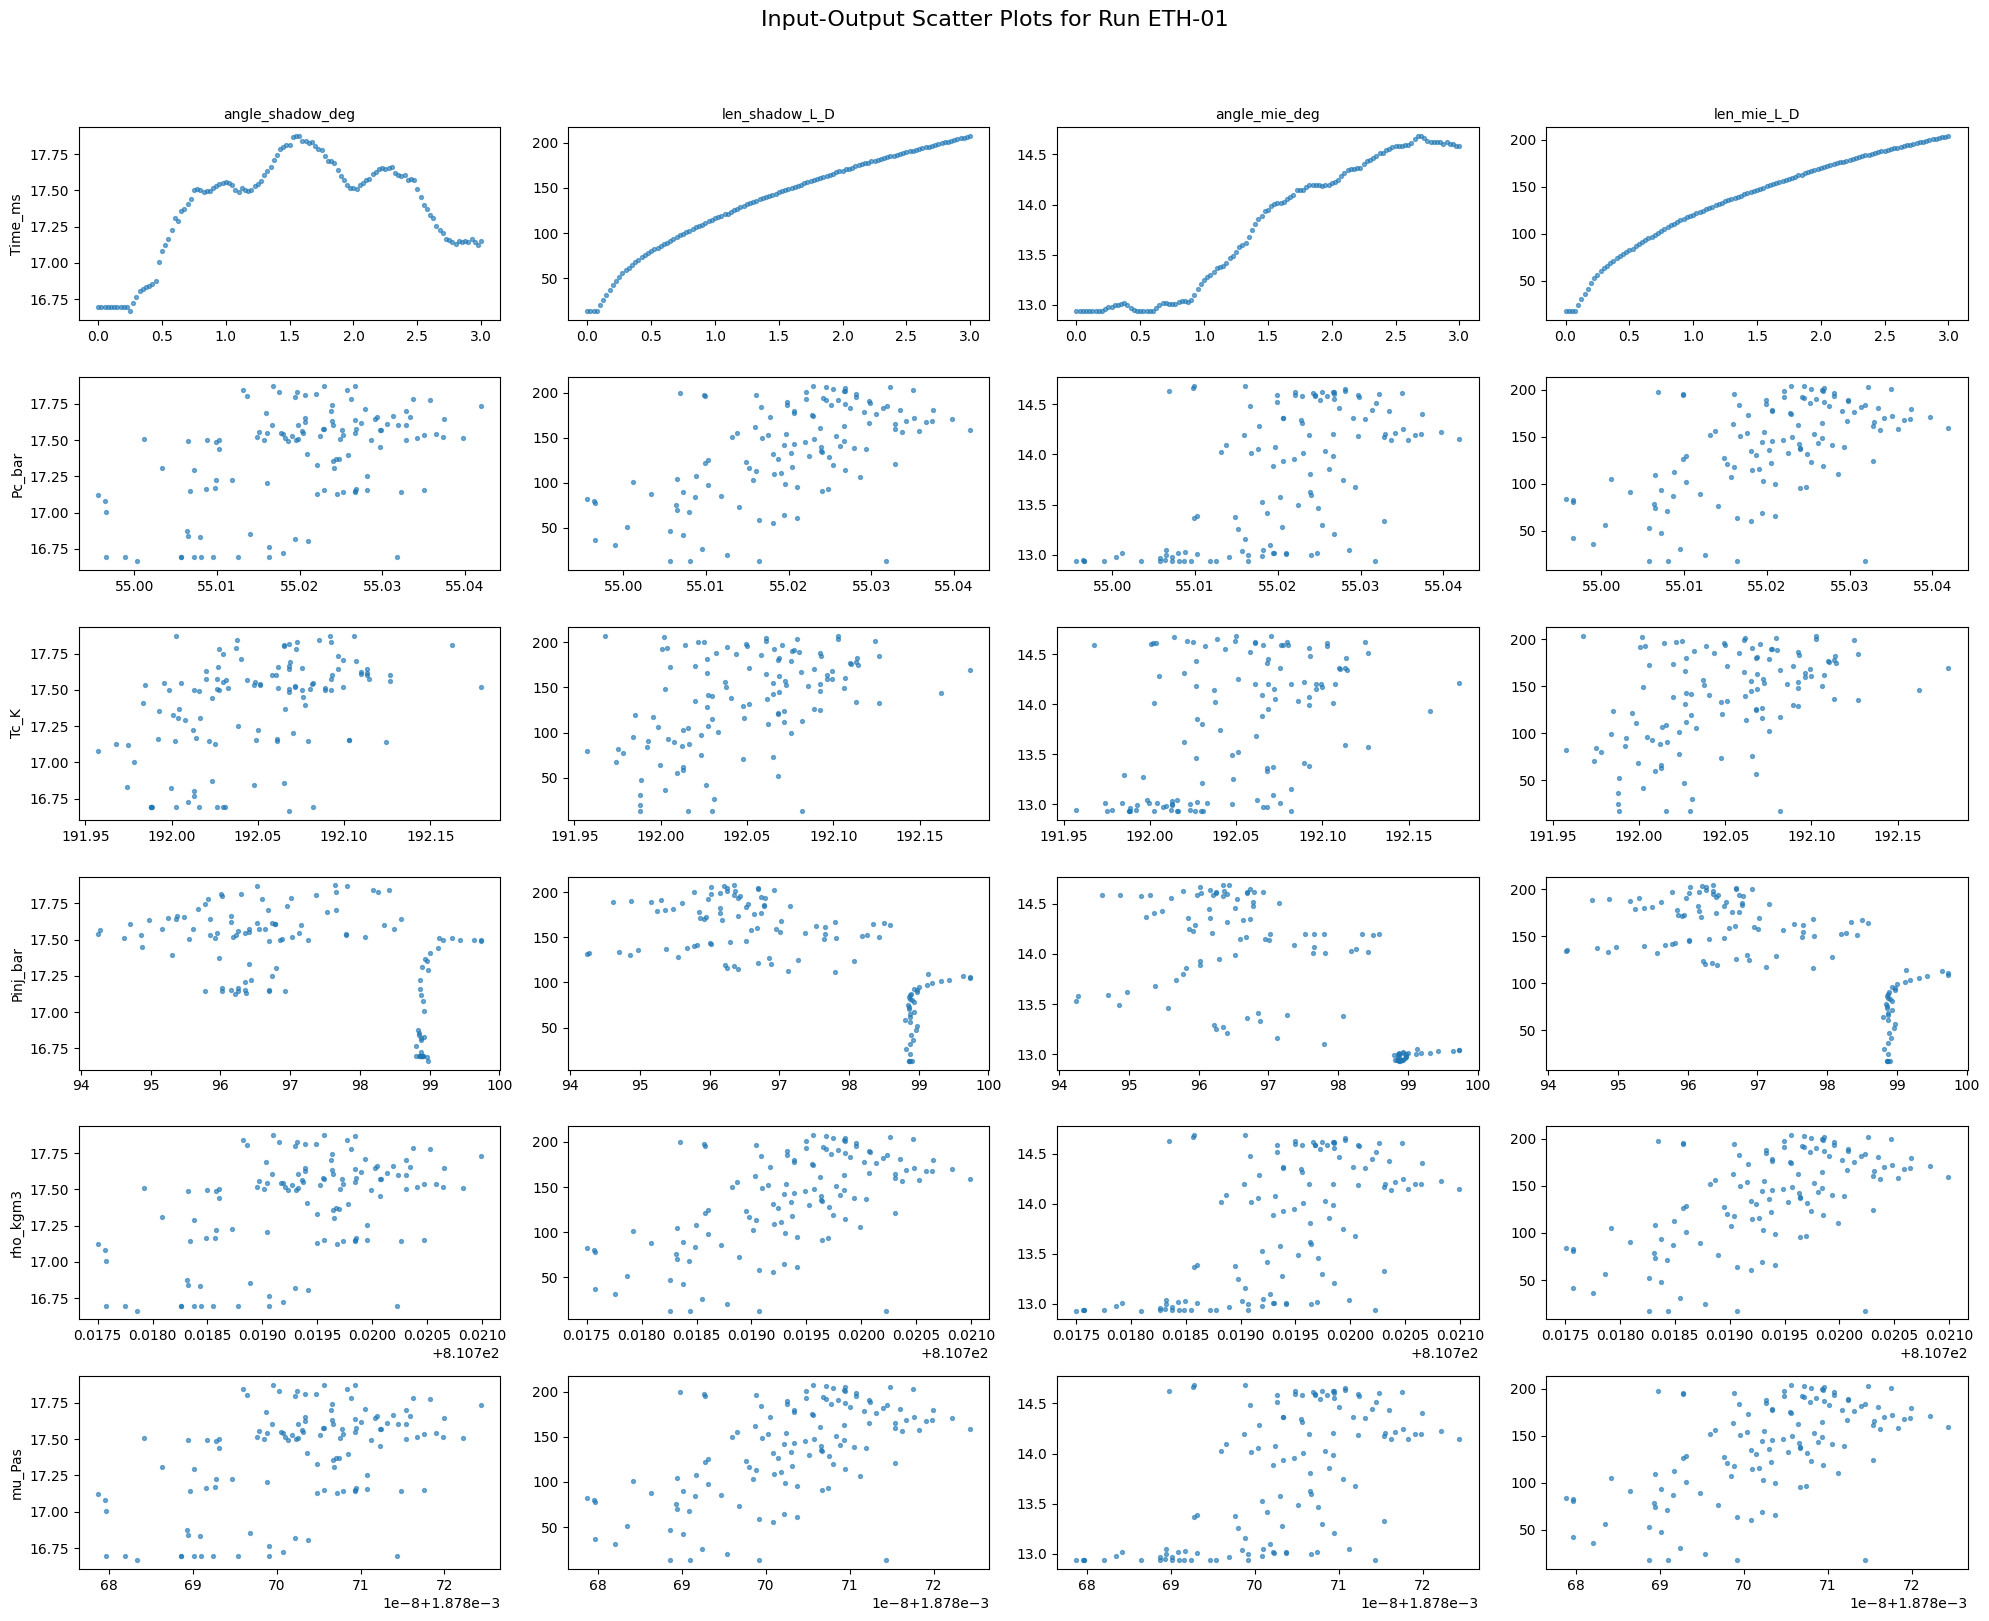

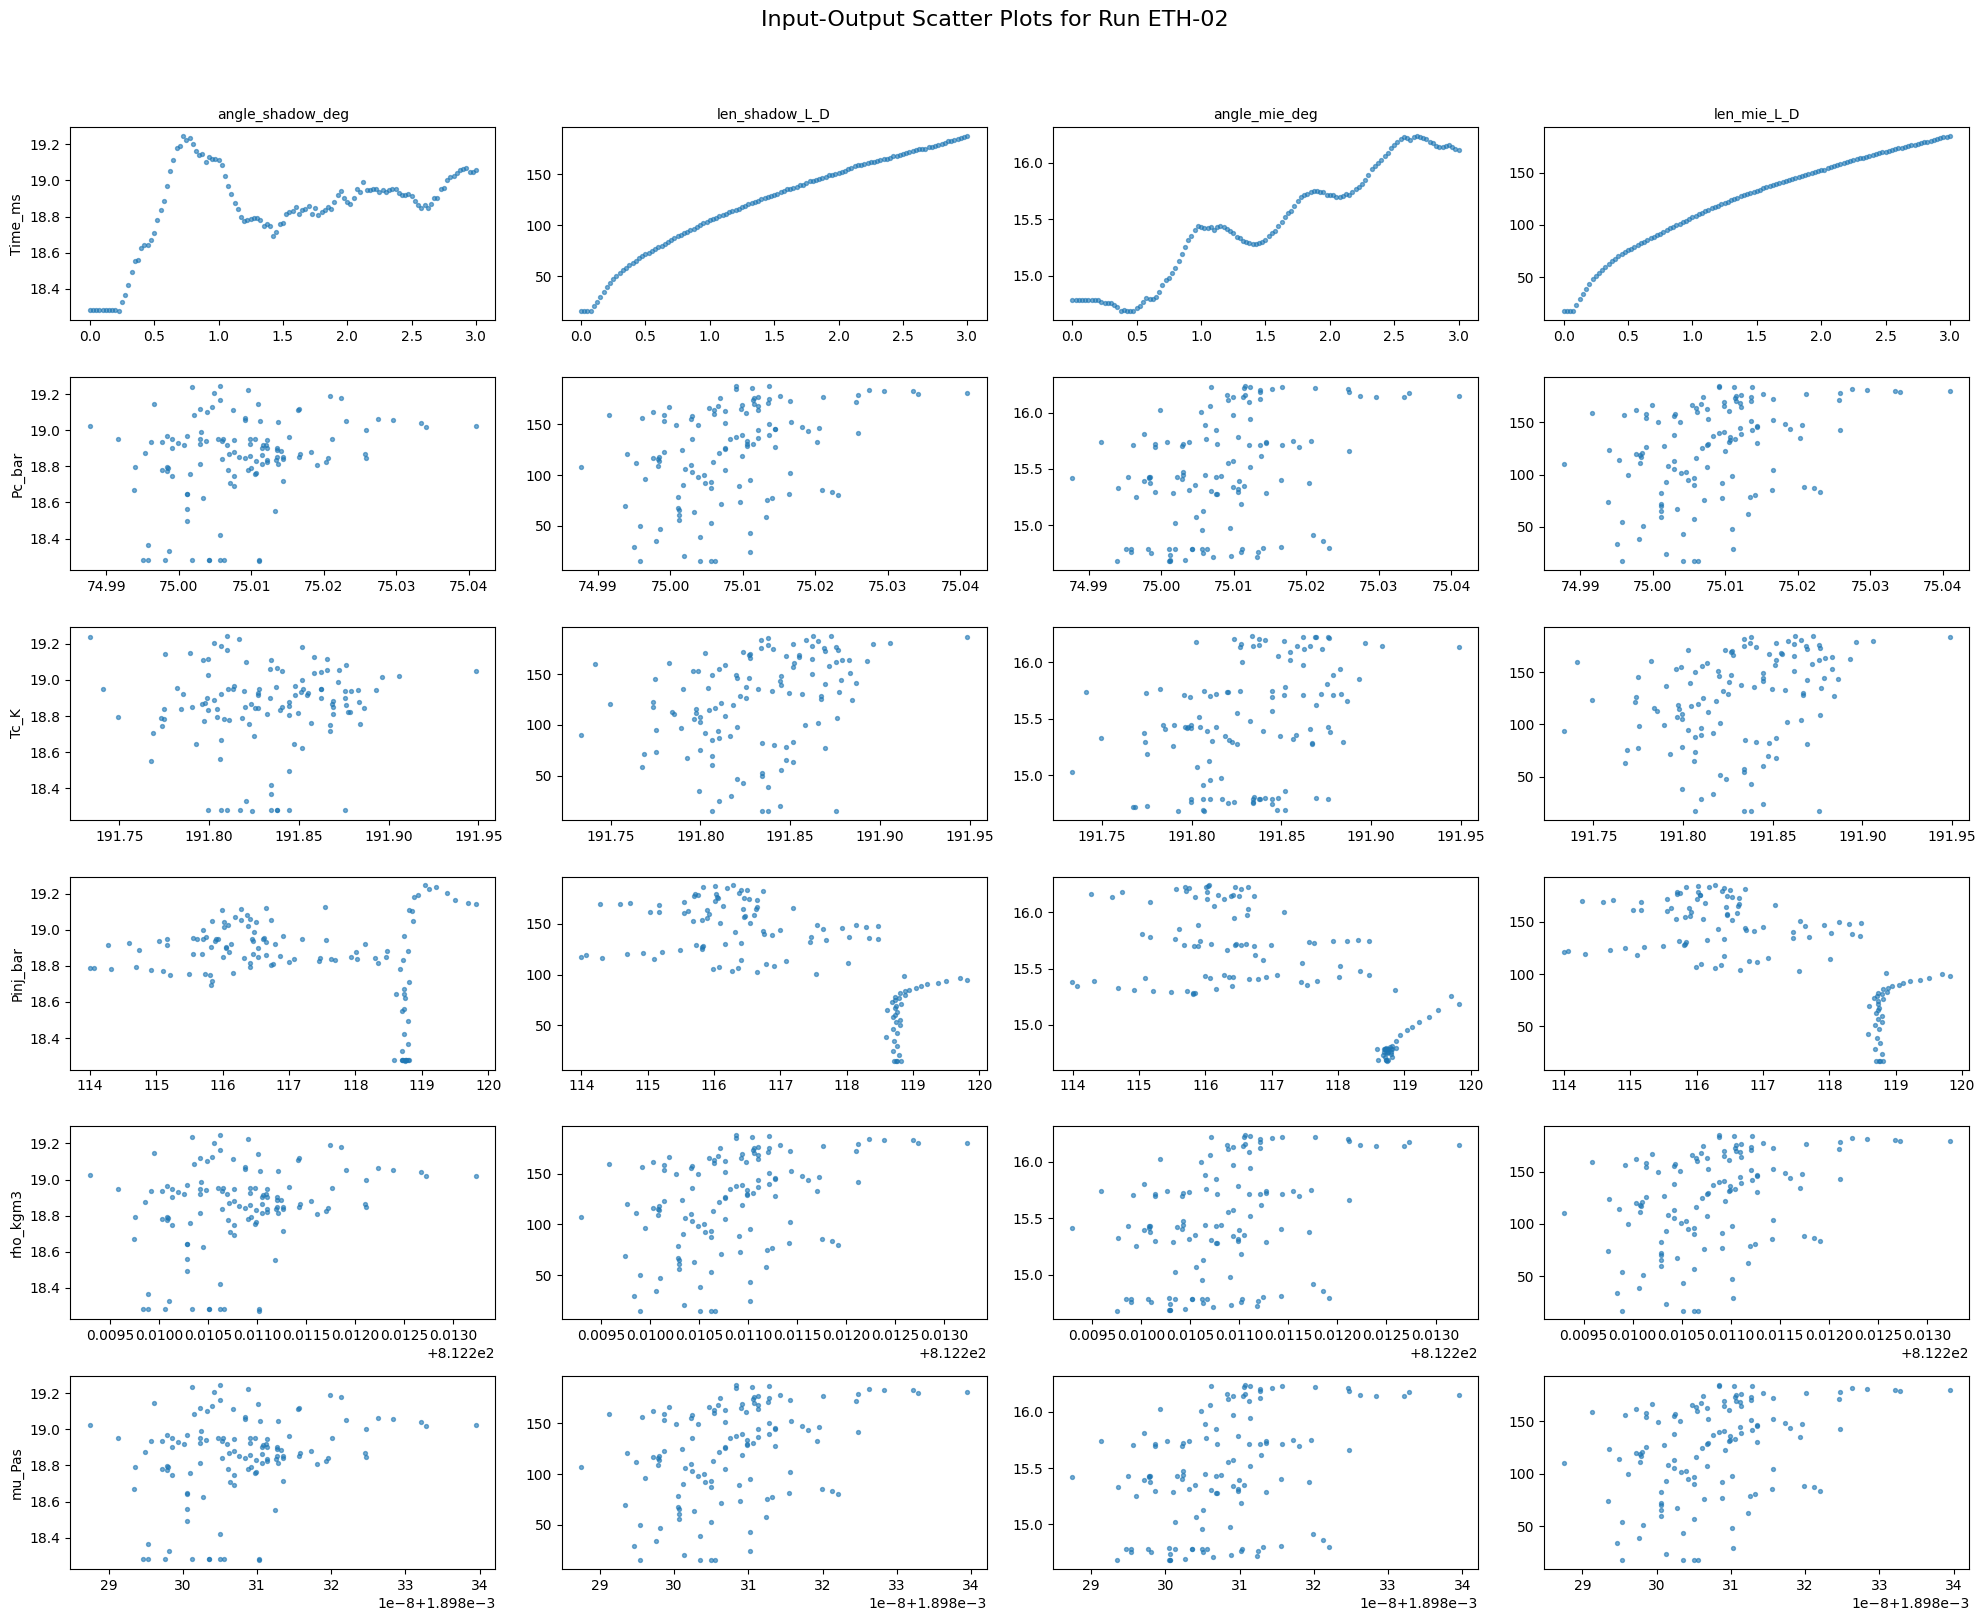

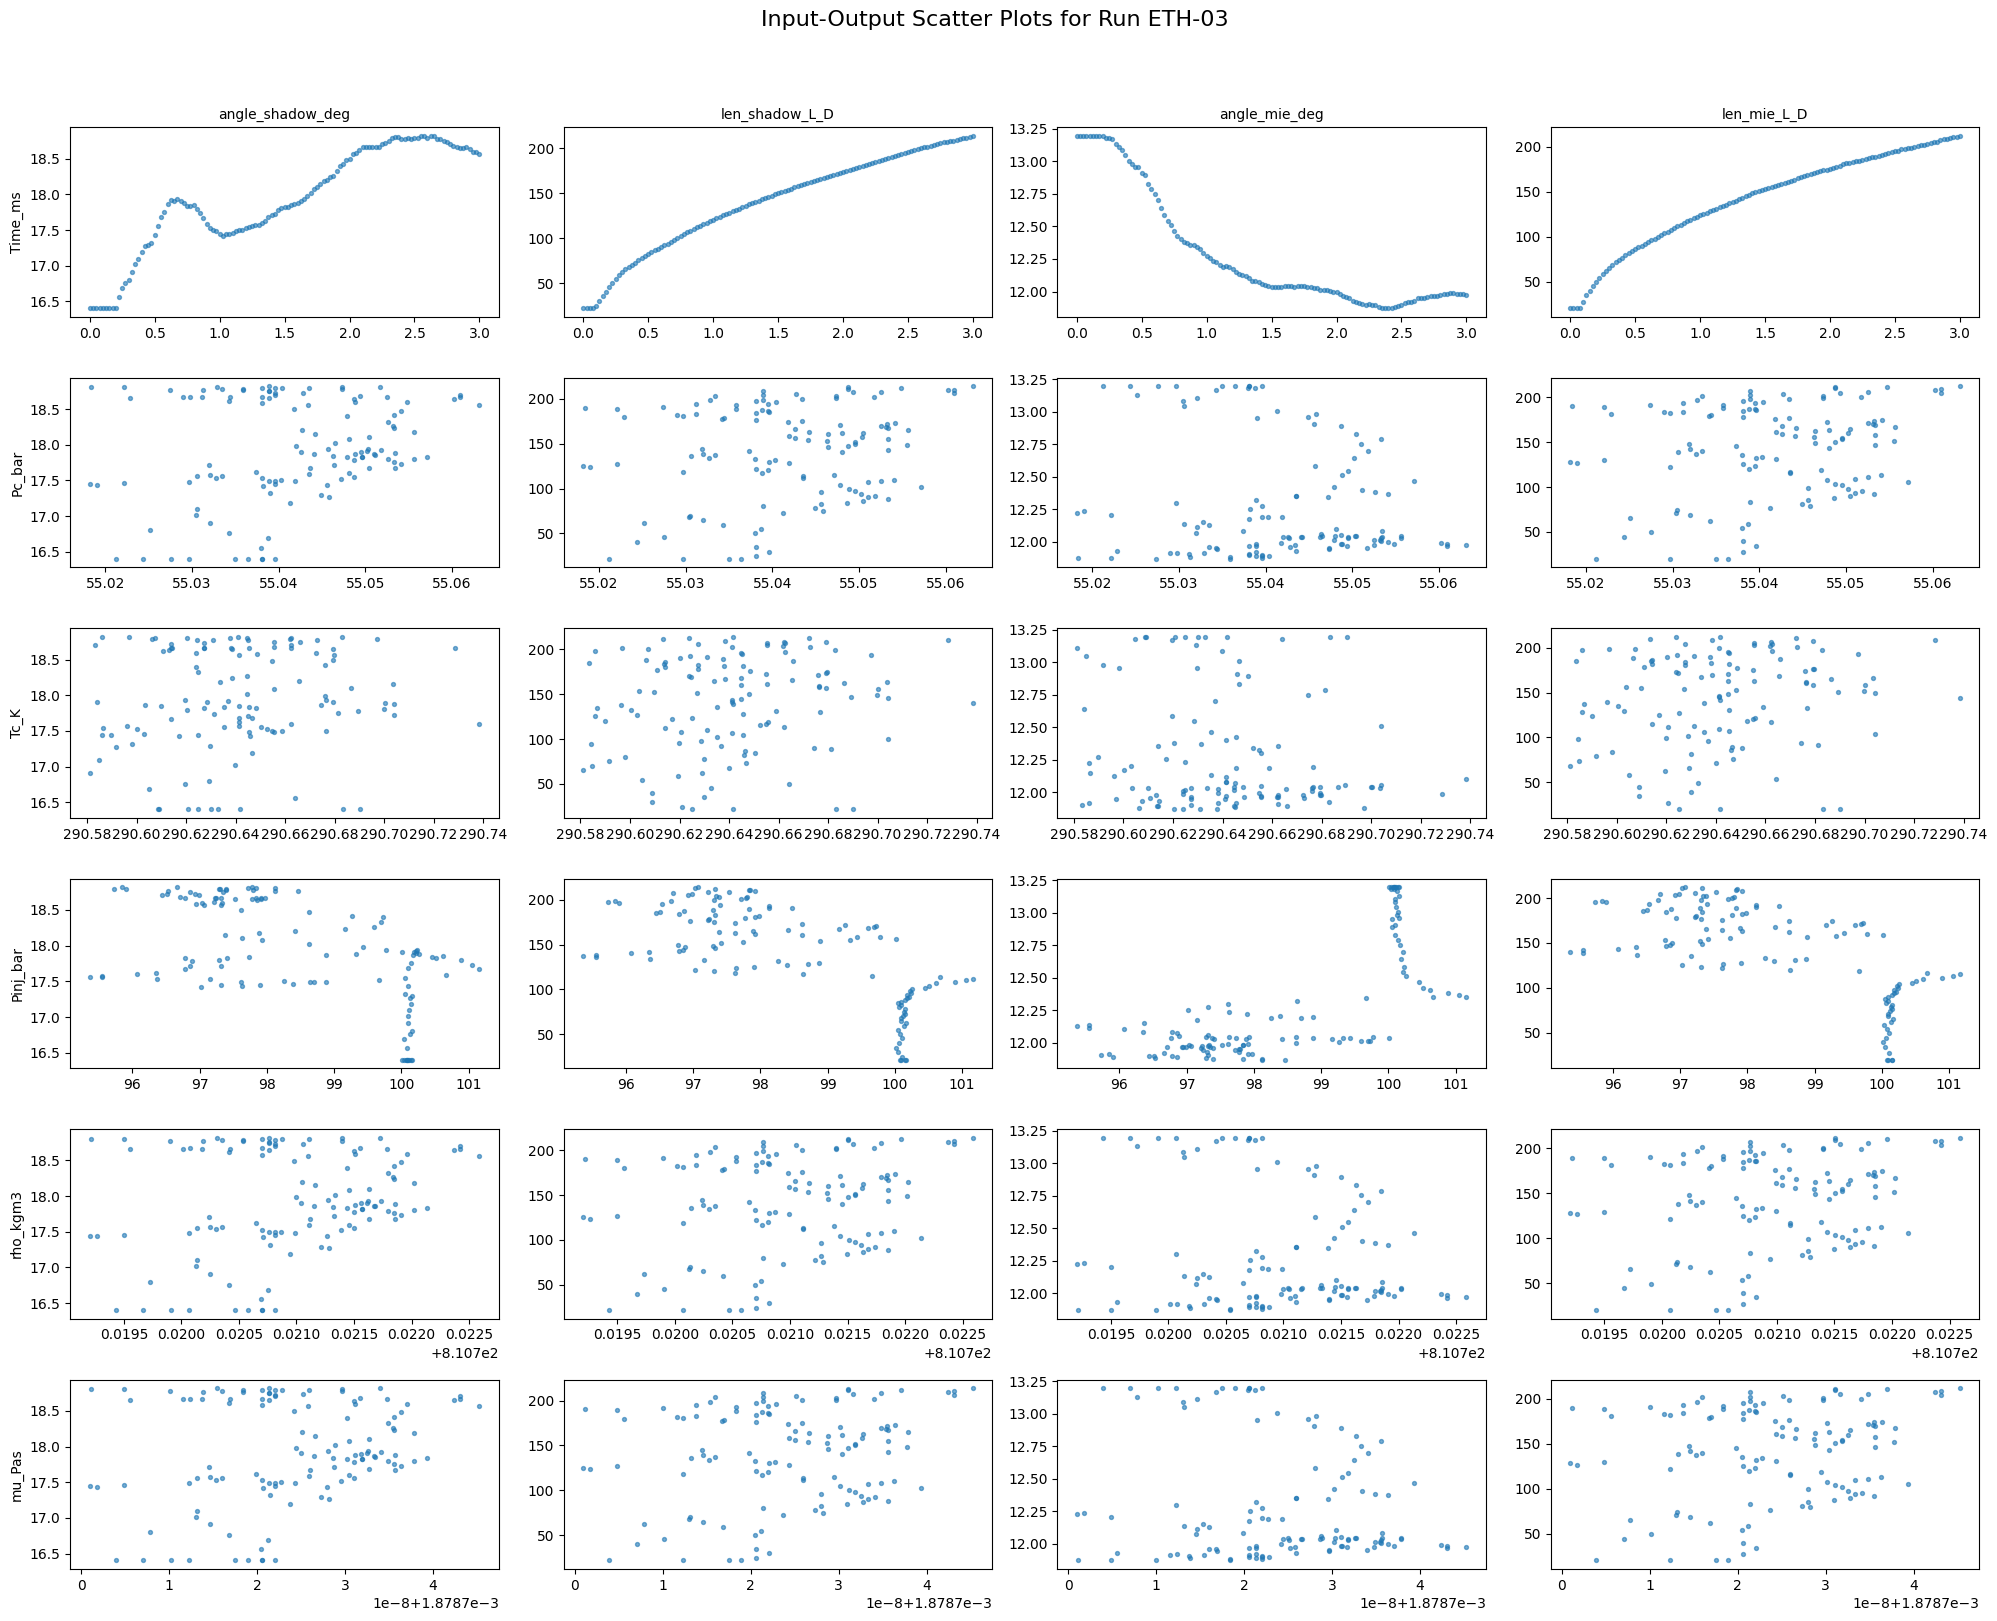

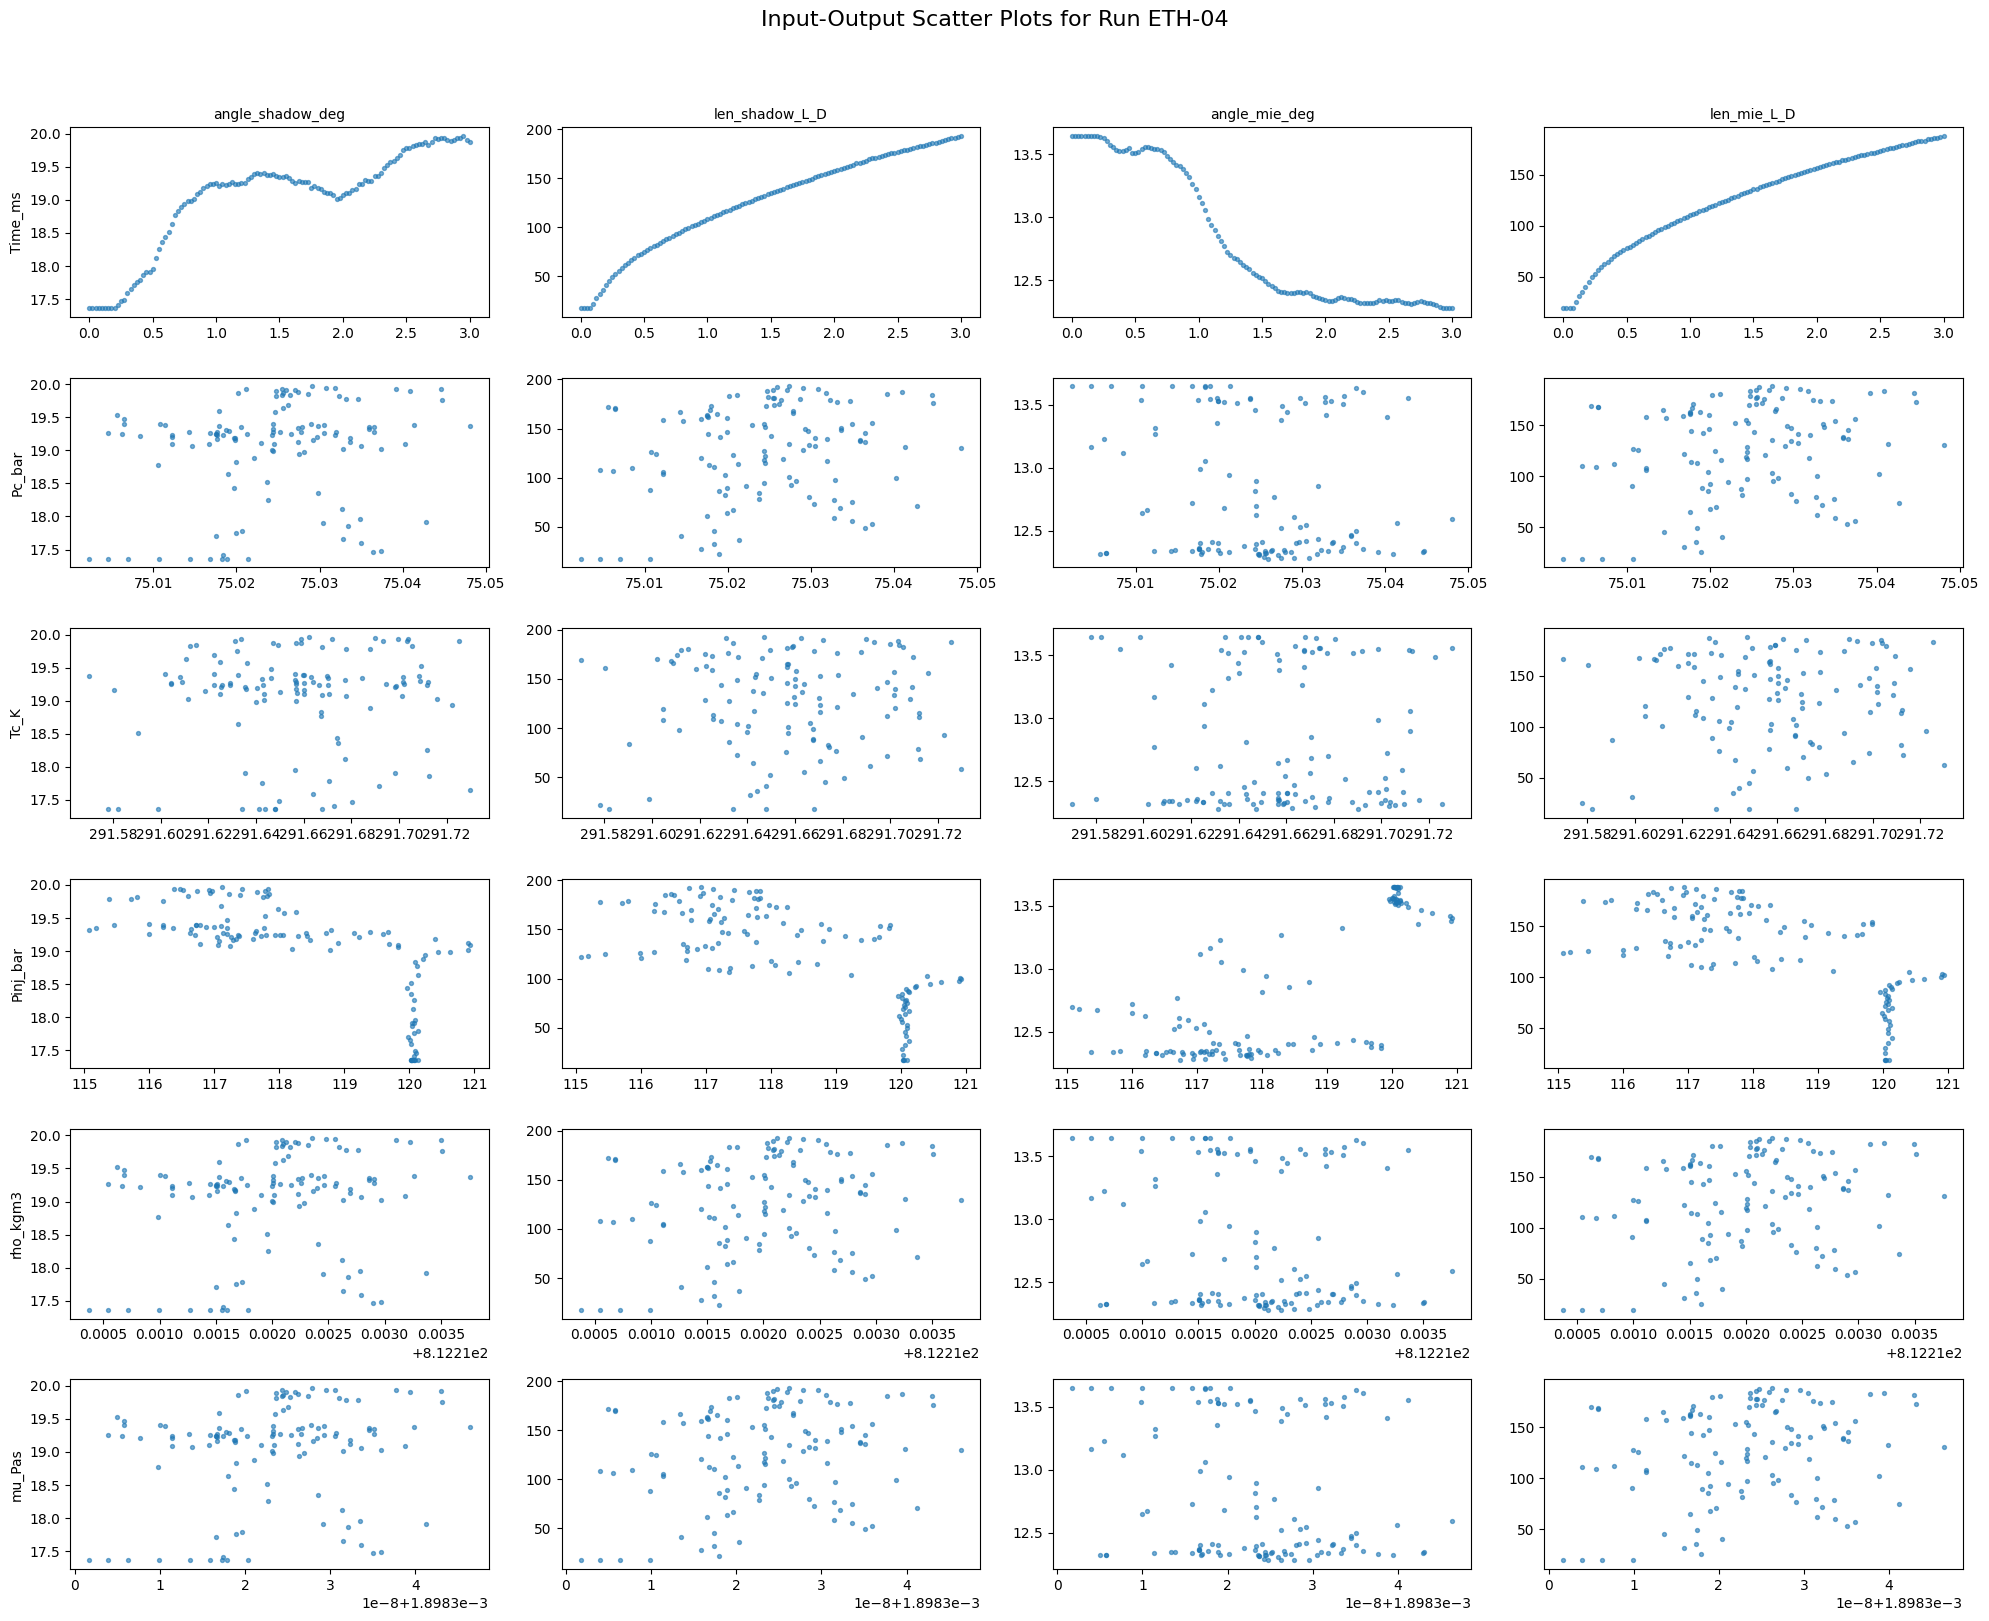

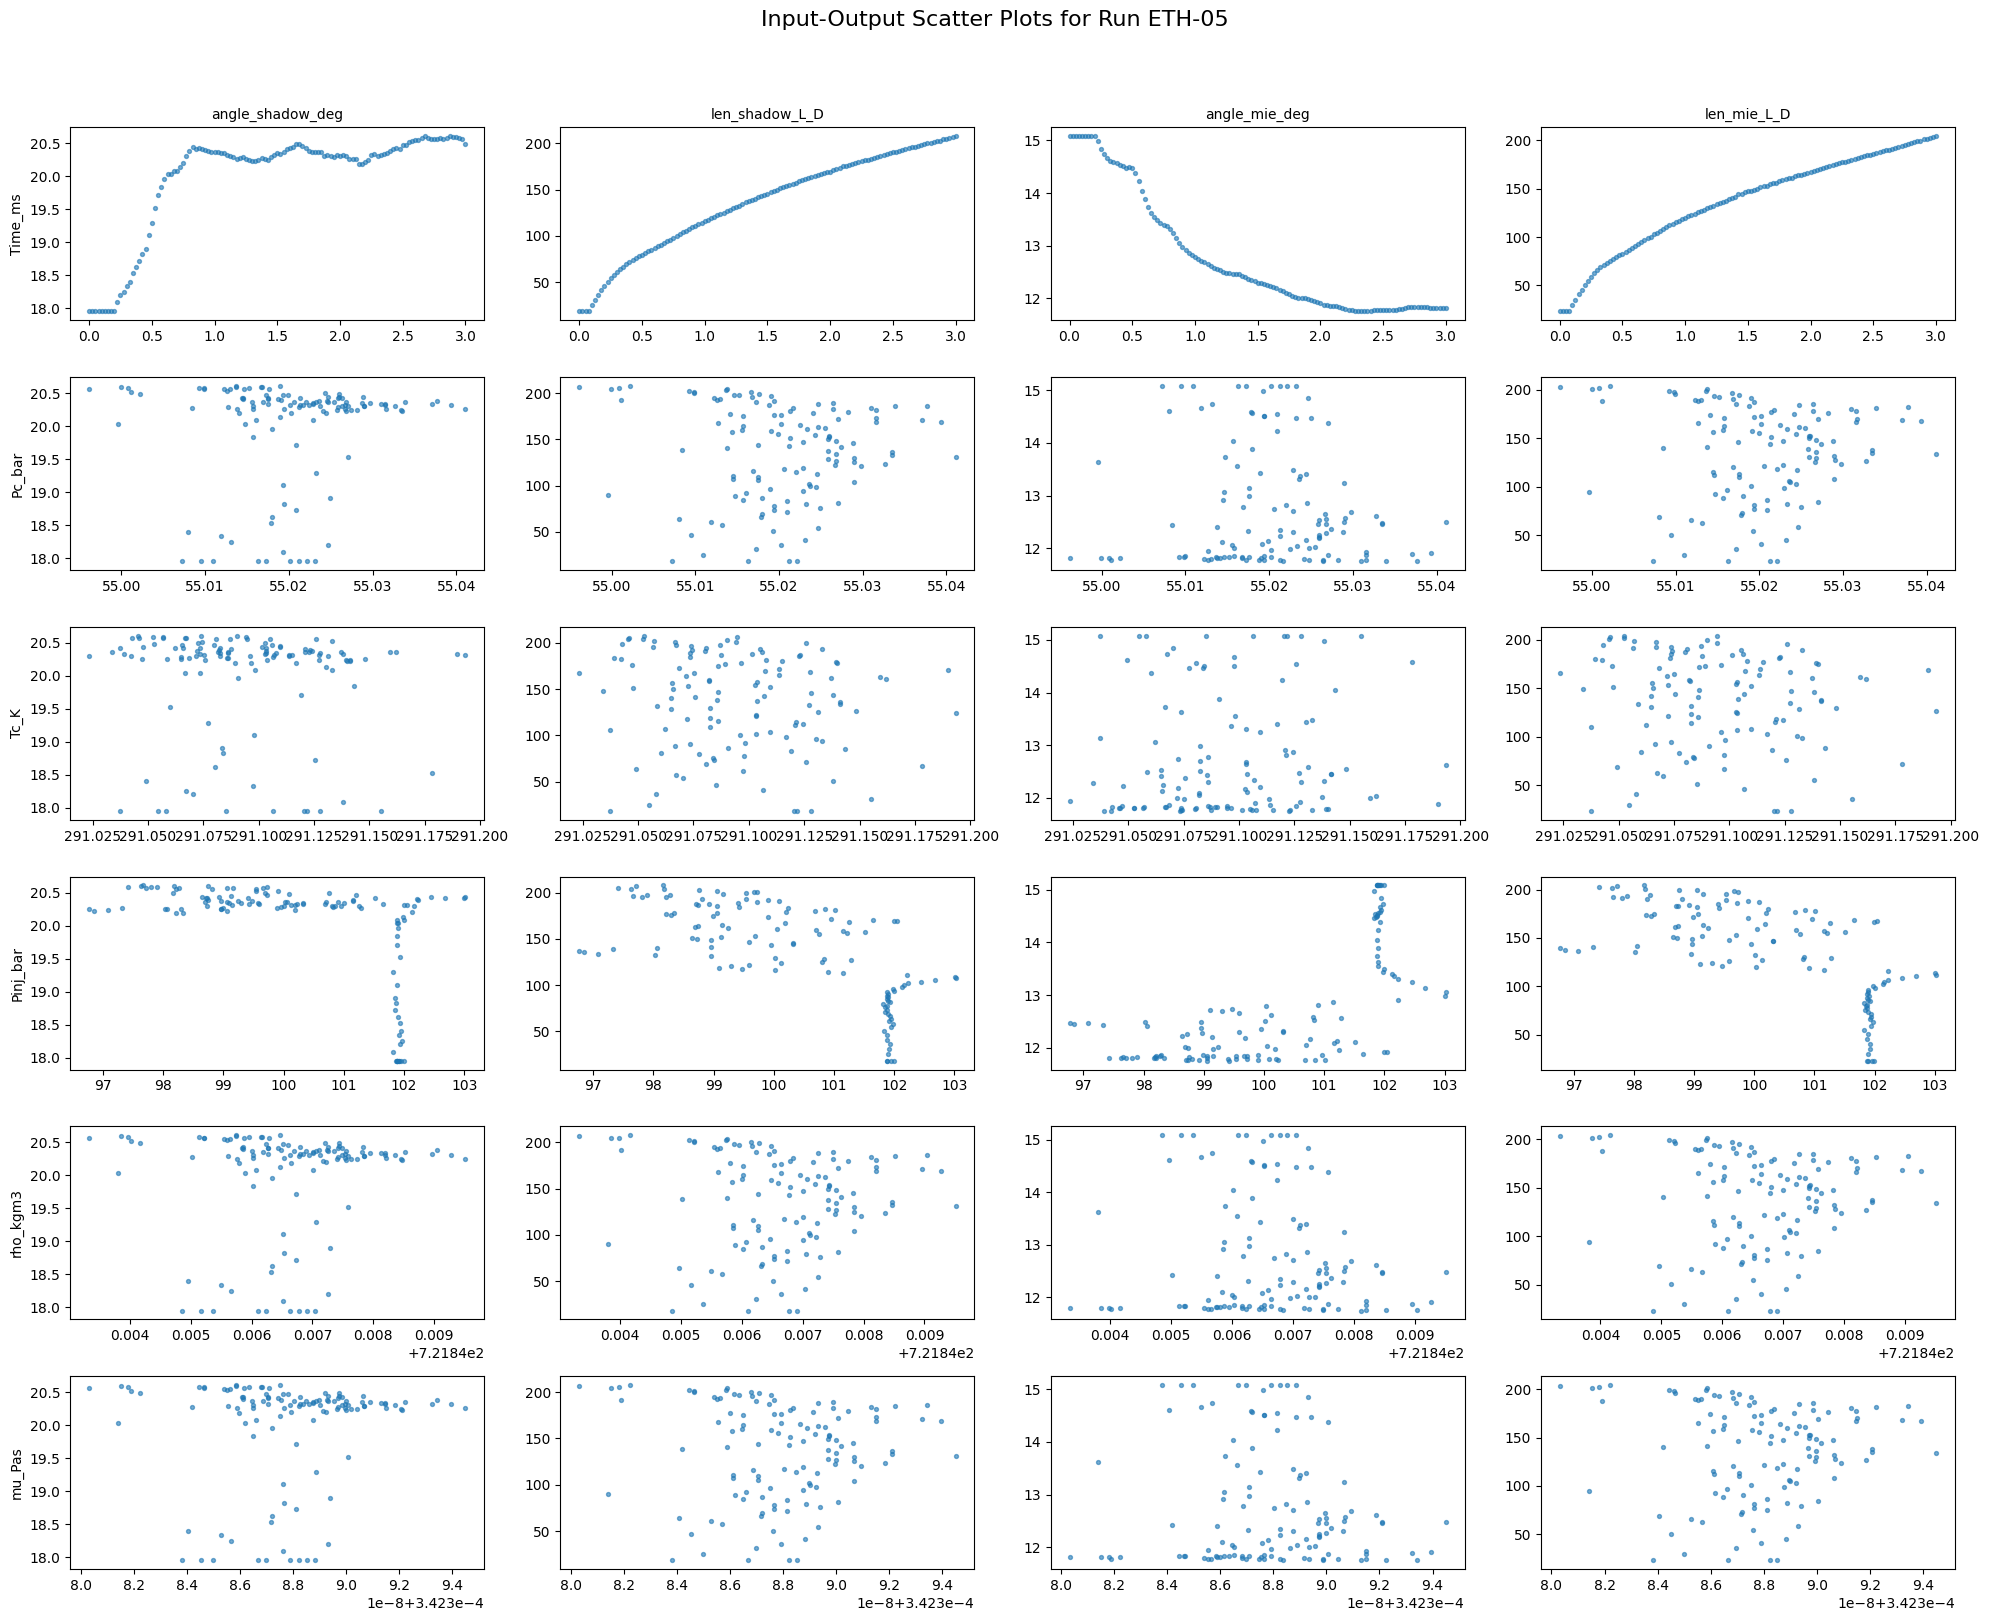

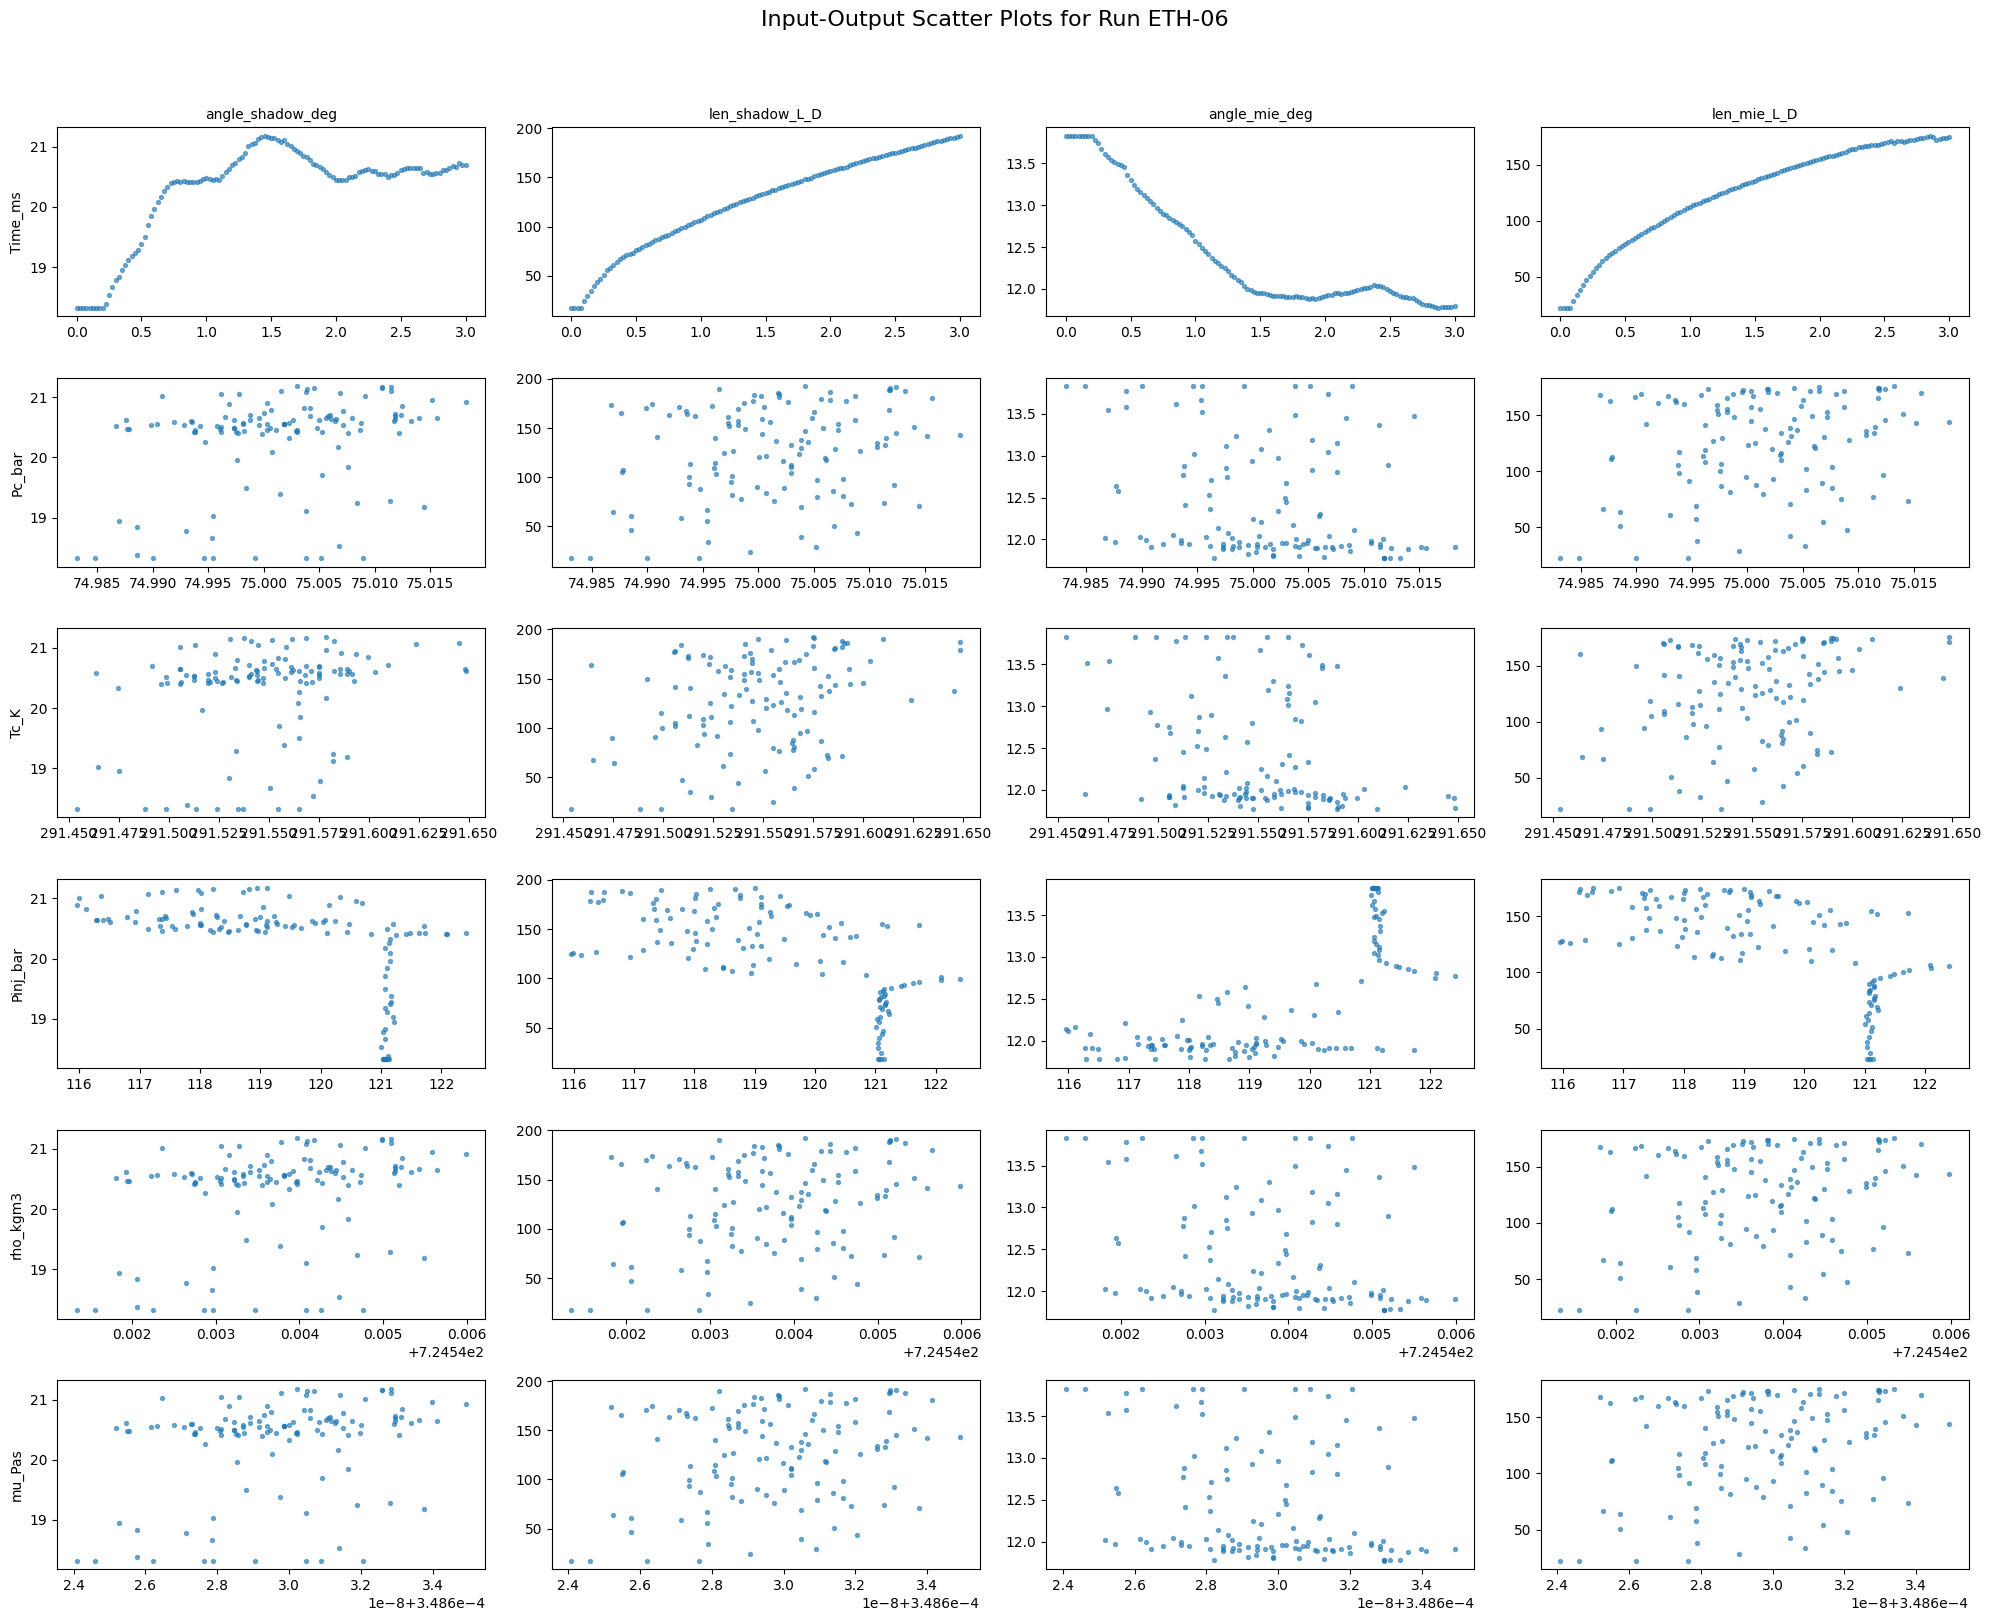

In [ ]:
# Cell 11: Input-output scatter by run
# Plots each input against each output for every run separately in a grid of plots.
# This visually reveals how each feature affects every target in each ETH experiment.

input_features  = ["Time_ms","Pc_bar","Tc_K","Pinj_bar","rho_kgm3","mu_Pas"]
output_targets  = ["angle_shadow_deg","len_shadow_L_D","angle_mie_deg","len_mie_L_D"]
run_list = sorted(df["run"].unique())

for run in run_list:
    df_run = df[df["run"] == run]
    plt.figure(figsize=(20,16))
    plot_num = 1
    for row, xvar in enumerate(input_features):
        for col, yvar in enumerate(output_targets):
            plt.subplot(len(input_features),len(output_targets),plot_num)
            plt.scatter(df_run[xvar], df_run[yvar], s=8, alpha=0.6)
            if row == 0:
                plt.title(yvar, fontsize=10)
            if col == 0:
                plt.ylabel(xvar, fontsize=10)
            plot_num += 1
    plt.suptitle(f"Input-Output Scatter Plots for Run {run}", fontsize=16, y=1.01)
    plt.tight_layout(rect=(0, 0, 1, 0.98))
    plt.show()


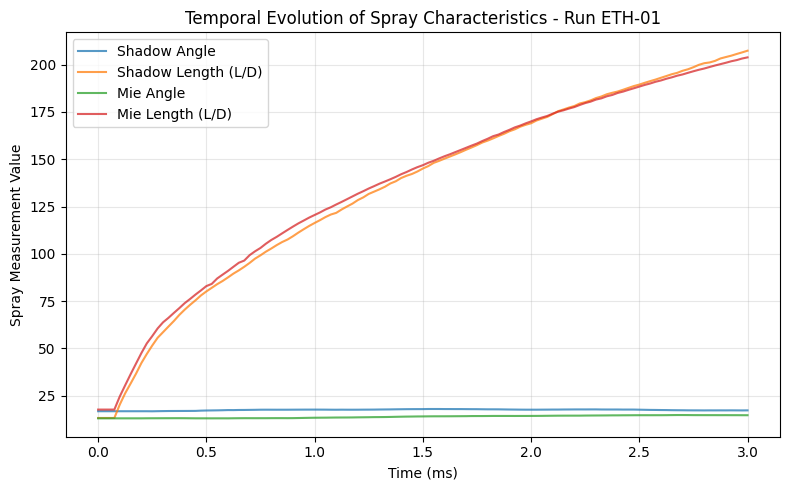

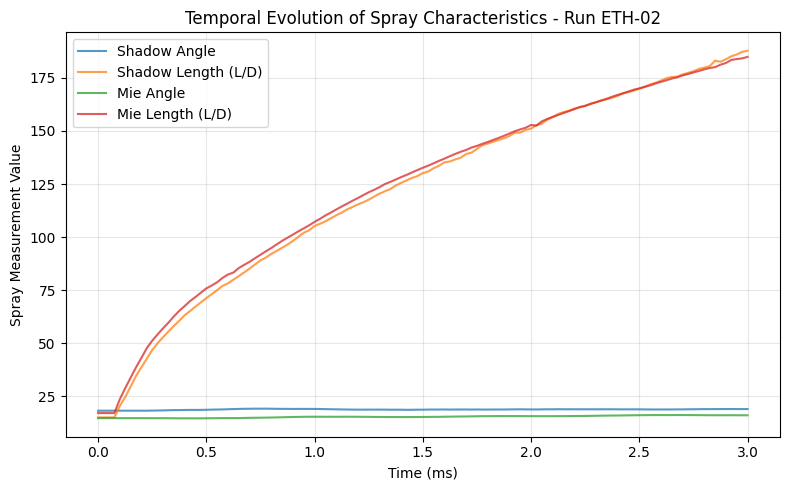

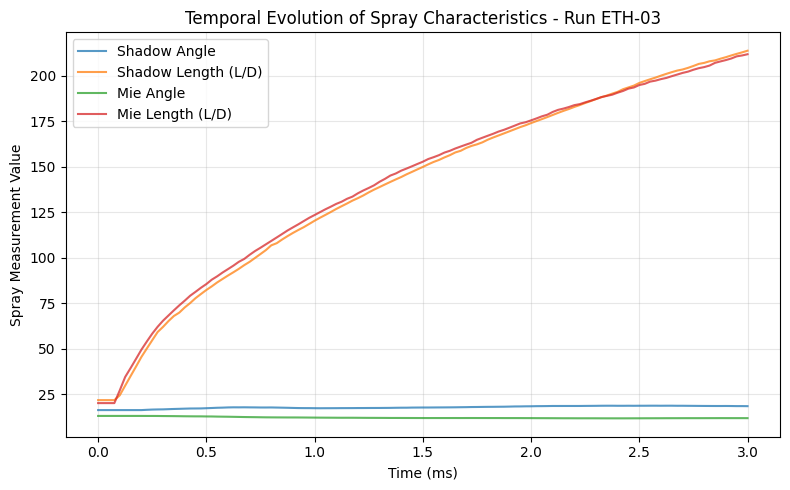

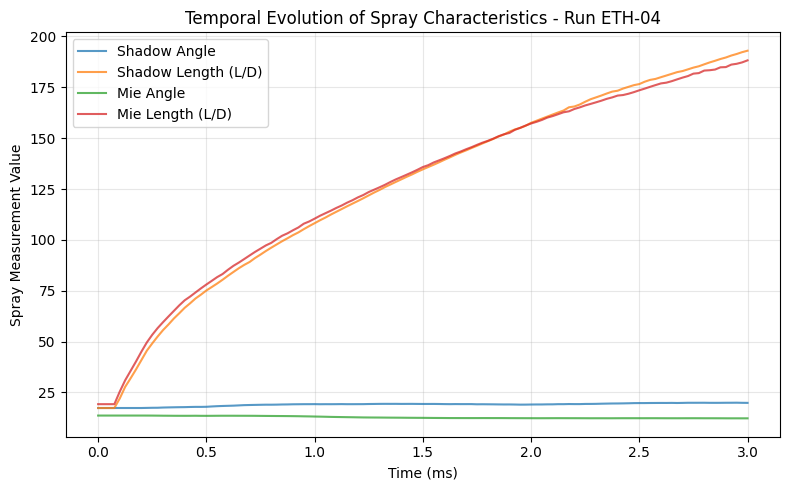

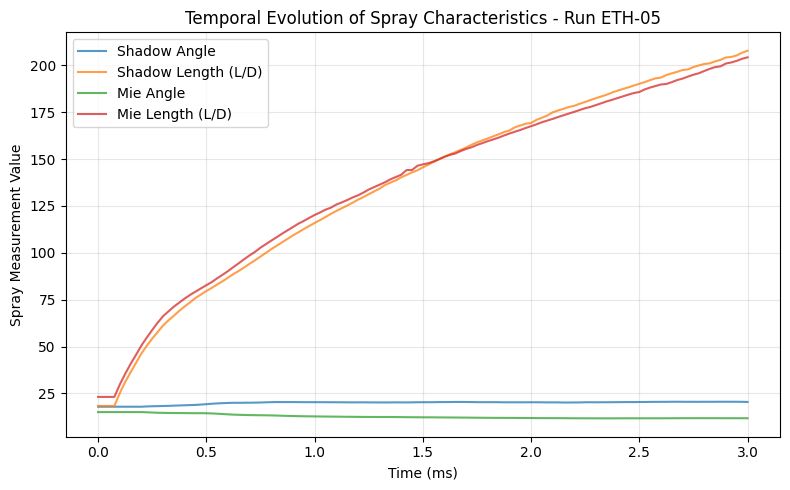

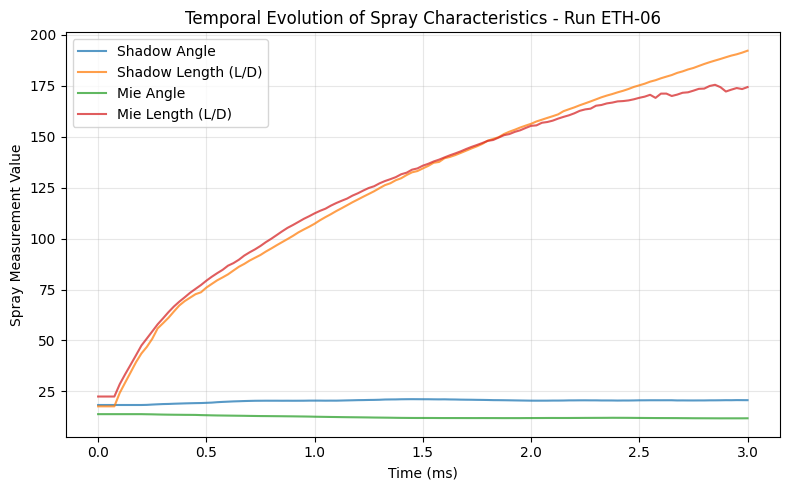

In [35]:
# Cell 14: Individual temporal dynamics plots per run
# Generates one plot for each run showing the evolution over time of all four spray characteristics.

targets = [
    ("angle_shadow_deg", "Shadow Angle"),
    ("len_shadow_L_D", "Shadow Length (L/D)"),
    ("angle_mie_deg", "Mie Angle"),
    ("len_mie_L_D", "Mie Length (L/D)"),
]

for run in sorted(df["run"].unique()):
    df_run = df[df["run"] == run]
    plt.figure(figsize=(8, 5))

    for target, label in targets:
        plt.plot(
            df_run["Time_ms"],
            df_run[target],
            alpha=0.75,
            label=label,
        )

    plt.title(f"Temporal Evolution of Spray Characteristics - Run {run}")
    plt.xlabel("Time (ms)")
    plt.ylabel("Spray Measurement Value")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
